
## **Mini Visualization Dashboard-Titanic Dataset**


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

**Loading the Data**

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Cleaning**

1. Fill missing Age with mean

In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


2. Drop Cabin column

In [4]:
df.drop(columns=['Cabin'], inplace=True)

3. Fill Embarked with mode

In [5]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


**Feature Engineering**

Create Family Size

In [6]:
df['FamilySize'] = df['SibSp'] + df['Parch']

Create Age Groups

In [7]:
bins = [0,12,18,35,60,80]
labels = ['Child','Teen','Young Adult','Adult','Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

Create Age Groups

In [13]:
bins = [0,12,18,35,60,80]
labels = ['Child','Teen','Young Adult','Adult','Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# **Dashboard Creation**

1. Survival by Gender (Bar Plot)

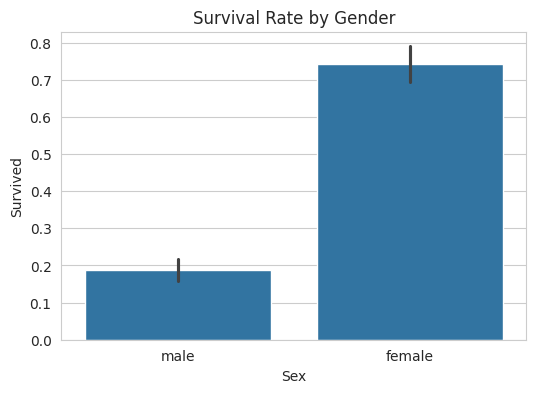

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

Females had significantly higher survival rates compared to males.

2. Survival by Passenger Class

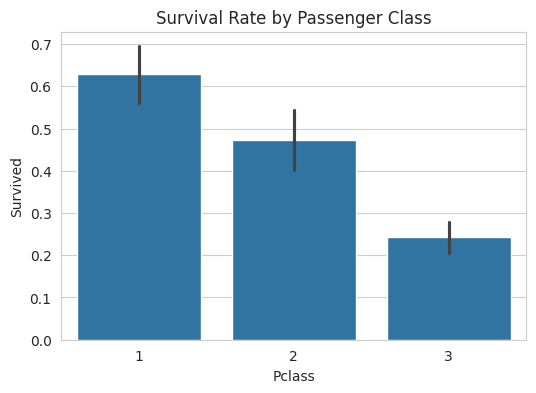

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

First-class passengers had better survival chances than third-class passengers.

3. Age Distribution (Histogram)

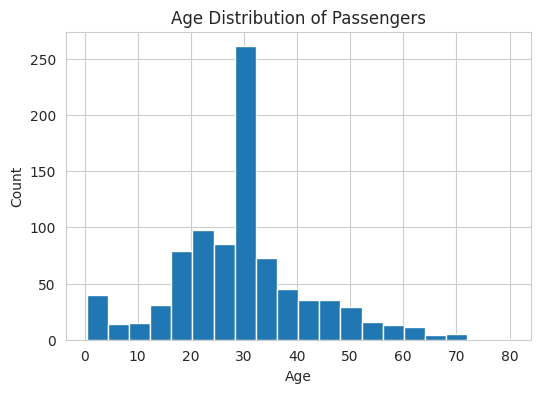

In [10]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

According to above hstogram,most passengers were young adults between 20–40 years.

4. Survival by Family Size

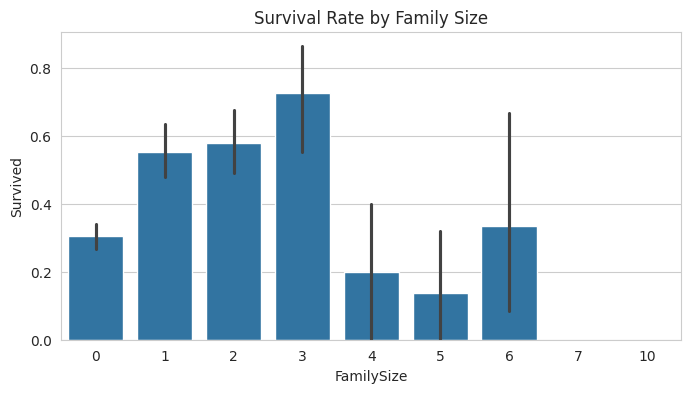

In [11]:
plt.figure(figsize=(8,4))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

Here, moderate family sizes had better survival rates compared to very large families.

5. Correlation Heatmap

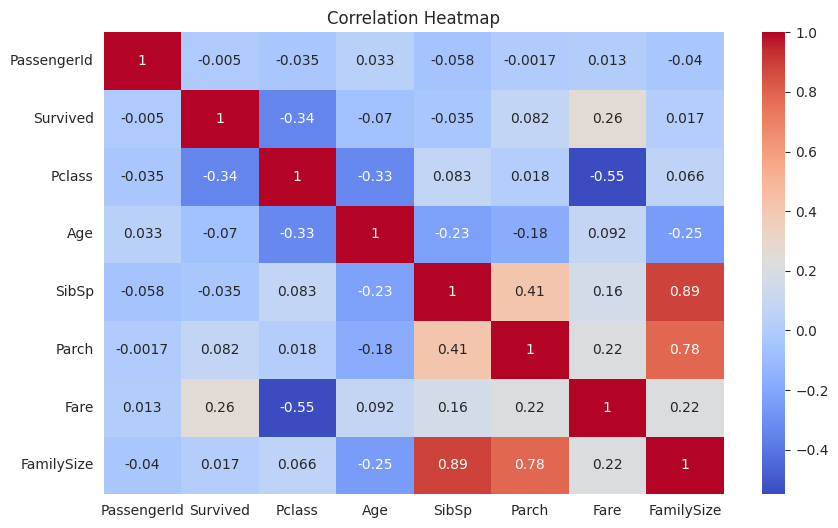

In [12]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Passenger class, fare, and survival show noticeable correlations.

6. Survival Rate by Age Group (Bar Chart)

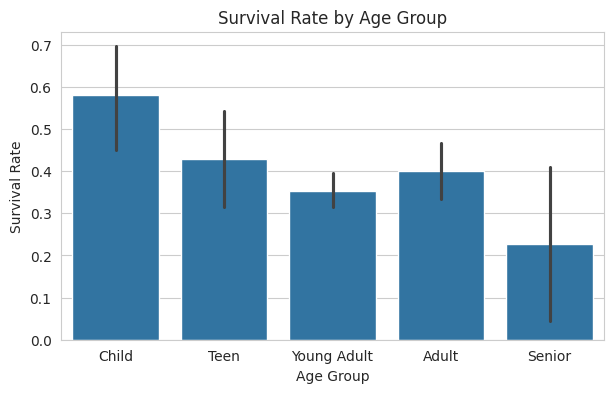

In [14]:
plt.figure(figsize=(7,4))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

Children had relatively higher survival rates, indicating priority rescue efforts, while older passengers showed lower survival probability.

# Conclusion


*   Gender strongly influenced survival.
*   Higher class passengers had priority.
*   Age showed moderate impact.
*   Family size affected survival probability.